In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file and get some basic info about it

In [48]:
df = pd.read_csv("output.csv")
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,48,Local-gov,7th-8th,1,NaN,Prof-specialty,Other-relative,Black,Male,7826,77249,60.0,Poland,>50K
1,68,NaN,Prof-school,1,Divorced,Priv-house-serv,Unmarried,Asian-Pac-Islander,Female,84532,60981,73.0,NaN,<=50K
2,31,State-gov,Bachelors,2,Married-spouse-absent,Protective-serv,Wife,Black,Male,35297,15093,98.0,Hungary,<=50K
3,84,Never-worked,7th-8th,10,Separated,Handlers-cleaners,Other-relative,Asian-Pac-Islander,Male,27074,40203,NaN,South,<=50K
4,59,Private,12th,16,Married-civ-spouse,Machine-op-inspct,Other-relative,White,Female,73785,2056,4.0,Haiti,<=50K


In [49]:
# Lets see the columns where we have missing values
df.head().isna().sum()

age               0
workclass         1
education         0
education_num     0
marital_status    1
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    1
native_country    1
income            0
dtype: int64

### Workclass

In [37]:
workclass_counts = df['workclass'].value_counts(dropna=False)
workclass_counts

workclass
Self-emp-inc        134
Private             130
Never-worked        124
State-gov           116
Without-pay         115
Self-emp-not-inc    114
Local-gov           111
Federal-gov         106
NaN                  50
Name: count, dtype: int64

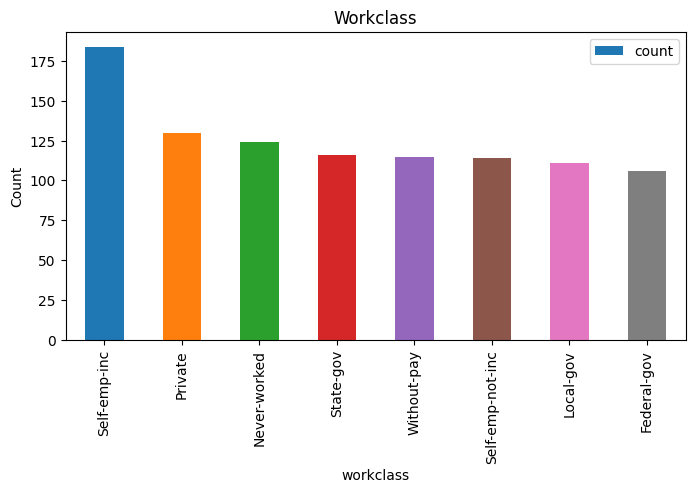

In [61]:
def plot_data(data, title, xlabel):

  # Plotting
  plt.figure(figsize=(8, 4))  # Set width and height here
  colors = plt.cm.tab10(range(len(data)))
  data.plot(kind='bar', color=colors)

  plt.xlabel(xlabel)
  plt.ylabel('Count')
  plt.title(title)
  plt.legend()

  plt.show()

plot_data(workclass_counts, "Workclass", "workclass")

#### Filling missing workclass values

In order to fill missing values we will use mode.

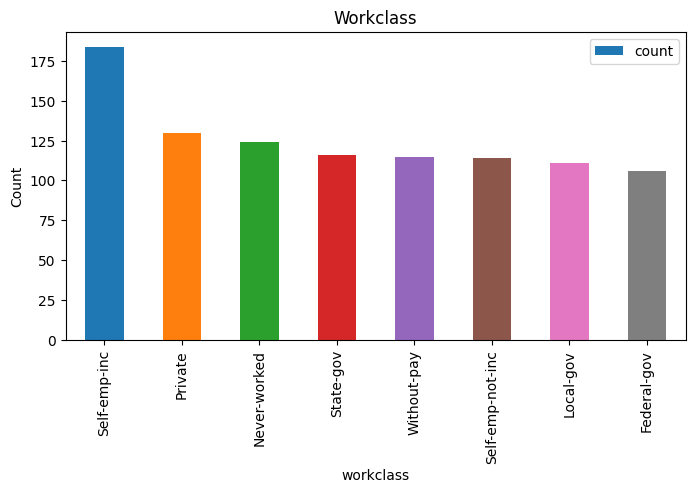

In [62]:
# Calculate the mode of the 'workclass' column
workclass_mode = df['workclass'].mode()[0]  # mode() returns a Series, [0] gets the first value

# Fill missing values with the mode
df['workclass'].fillna(workclass_mode, inplace=True)

workclass_counts = df['workclass'].value_counts()
plot_data(workclass_counts, "Workclass", "workclass")

## Marital Status

In [63]:
marital_counts = df['marital_status'].value_counts(dropna=False)
marital_counts

marital_status
Divorced                 155
Married-spouse-absent    139
Married-AF-spouse        136
Separated                135
Married-civ-spouse       129
Never-married            129
Widowed                  127
NaN                       50
Name: count, dtype: int64

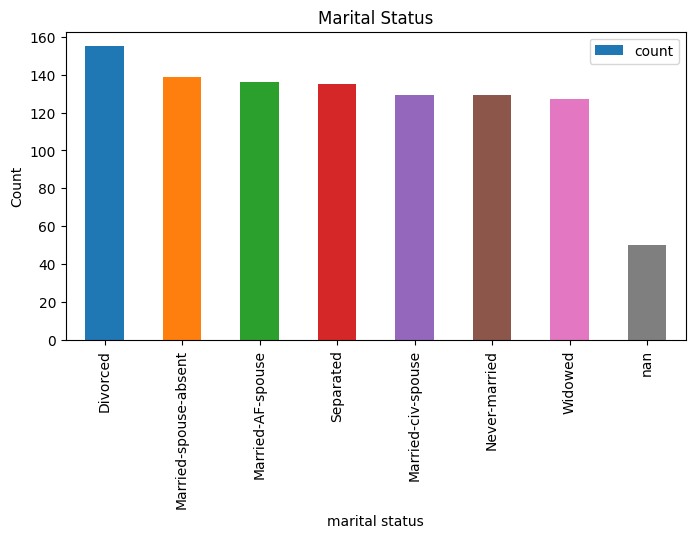

In [65]:
plot_data(marital_counts, "Marital Status", "marital status")

#### Filling missing marital status values

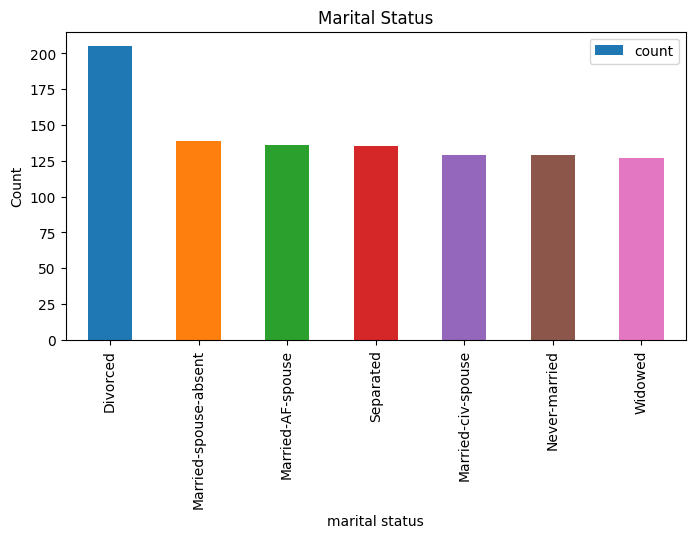

In [67]:
# Calculate the mode of the 'workclass' column
marital_mode = df['marital_status'].mode()[0]  # mode() returns a Series, [0] gets the first value

# Fill missing values with the mode
df['marital_status'].fillna(marital_mode, inplace=True)

marital_counts = df['marital_status'].value_counts()
plot_data(marital_counts, "Marital Status", "marital status")

## Hours per week

In [68]:
print(f"Missing values = {df['hours_per_week'].isna().sum()}")

Missing values = 0


### Fliing missing hours_per_week

We Will use median to fill missing values

In [69]:
hours_per_week_median = df['hours_per_week'].median()

# Fill missing values with the median
df['hours_per_week'].fillna(hours_per_week_median, inplace=True)

print(f"Missing values = {df['hours_per_week'].isna().sum()}")

Missing values = 0


## Native country

In [70]:
print(f"Missing = {df['native_country'].isna().sum()}")

Missing = 0


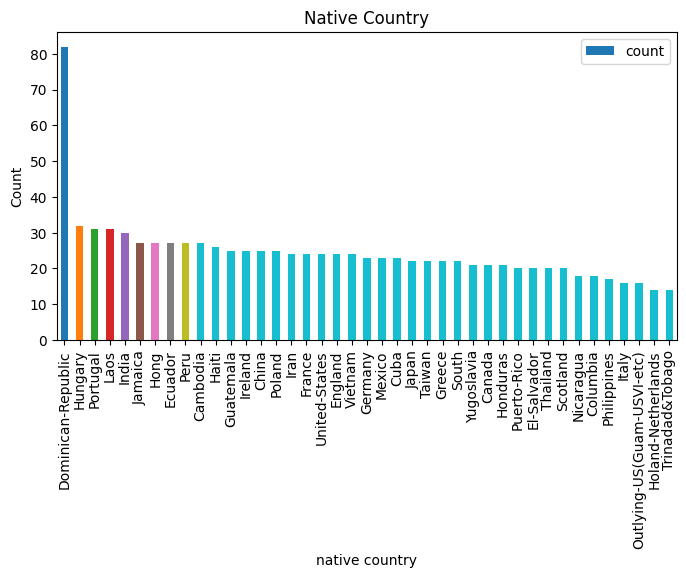

In [72]:
capital_counts = df['native_country'].value_counts(dropna=False)
plot_data(capital_counts, "Native Country", "native country")

### Filling native_country

In [73]:
country_mode = df['native_country'].mode()[0]  # mode() returns a Series, [0] gets the first value

# Fill missing values with the mode
df['native_country'].fillna(country_mode, inplace=True)

# Now you can proceed with your analysis
# Assuming 'workclass' is the name of the column you're interested in
country_counts = df['native_country'].value_counts()

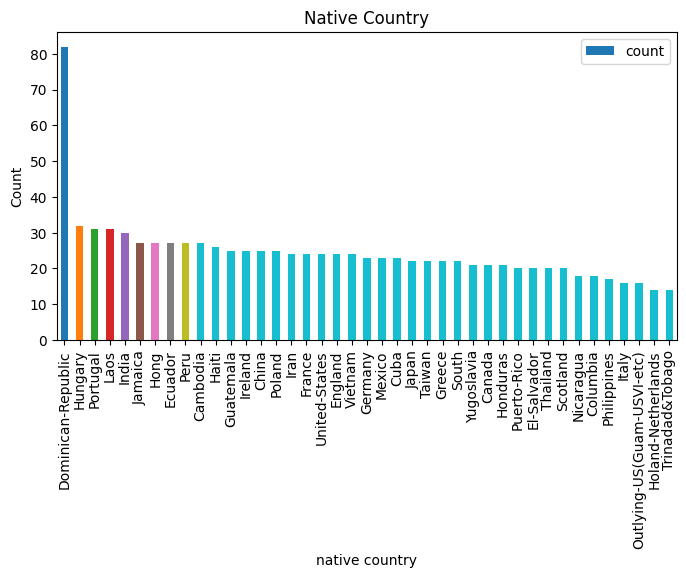

In [74]:
country_counts = df['native_country'].value_counts(dropna=False)
plot_data(capital_counts, "Native Country", "native country")

# Final Dataset

In [75]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,48,Local-gov,7th-8th,1,Divorced,Prof-specialty,Other-relative,Black,Male,7826,77249,60.0,Poland,>50K
1,68,Self-emp-inc,Prof-school,1,Divorced,Priv-house-serv,Unmarried,Asian-Pac-Islander,Female,84532,60981,73.0,Dominican-Republic,<=50K
2,31,State-gov,Bachelors,2,Married-spouse-absent,Protective-serv,Wife,Black,Male,35297,15093,98.0,Hungary,<=50K
3,84,Never-worked,7th-8th,10,Separated,Handlers-cleaners,Other-relative,Asian-Pac-Islander,Male,27074,40203,48.0,South,<=50K
4,59,Private,12th,16,Married-civ-spouse,Machine-op-inspct,Other-relative,White,Female,73785,2056,4.0,Haiti,<=50K


In [76]:
df.isna().sum()

age                0
workclass          0
education          0
education_num      0
marital_status     0
occupation         0
relationship      50
race               0
sex               50
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64